In [4]:
# NOTE: Jan 5th, run inference on A3D 2.0
import os
root = '../' # "/root/deeplabv3"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='1,3'
import sys
sys.path.append(os.path.join(root, "datasets"))
sys.path.append(os.path.join(root, "model"))
sys.path.append(os.path.join(root, "utils"))
from deeplabv3 import DeepLabV3
from utils import label_img_to_color
import cv2
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

from a3d import make_dataloader

import time
from tqdm import tqdm
import glob
device = 'cuda'
save_dir = '/home/data/vision7/A3D_2.0/segmentations/'
root = '/home/data/vision7/A3D_2.0/'

In [2]:
model_id = 1
model = DeepLabV3(model_id, project_dir=root, is_train=False)
model.load_state_dict(torch.load(os.path.join("/u/bryao/work/Documents/deeplabv3/pretrained_models/model_13_2_2_2_epoch_580.pth")))
model = model.to(device)
model.eval()

pretrained resnet, 18


DeepLabV3(
  (resnet): ResNet_BasicBlock_OS8(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d

In [3]:
val_dataloader = make_dataloader(root, 
                                shuffle=False, 
                                is_train=False,
                                distributed=False,
                                batch_per_gpu=8,
                                num_workers=8,
                                max_iters=None)

100%|██████████| 4989/4989 [00:01<00:00, 2588.72it/s]


In [7]:
for iters, batch in enumerate(tqdm(val_dataloader)):
    video_name, ids, images = batch
    images = images.to(device)

    outputs = model(images)
    outputs = F.upsample(outputs, size=(720, 1280), mode="bilinear")
    
    outputs.softmax(dim=1)
    
    outputs = outputs.data.cpu().numpy()
    pred_label_imgs = np.argmax(outputs, axis=1) # (shape: (batch_size, 1024, 2048))
    pred_label_imgs = pred_label_imgs.astype(np.uint8)

    viz = label_img_to_color(pred_label_imgs[0])
    for vid, idx, seg in zip(video_name, ids, pred_label_imgs):
        file_dir = os.path.join(save_dir, vid)
        if not os.path.exists(file_dir):
            os.makedirs(file_dir)
        file_name = os.path.join(file_dir, str(int(idx)).zfill(6)+'.png')
        cv2.imwrite(file_name, seg)
    
    break

  0%|          | 0/63098 [00:00<?, ?it/s]


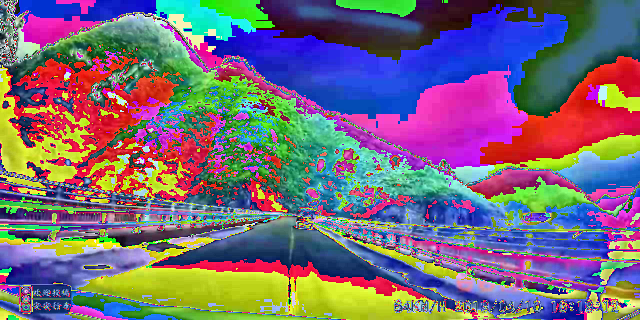

In [8]:
from PIL import Image
Image.fromarray((255*images[0].permute(1,2,0).cpu().numpy()).astype(np.uint8))

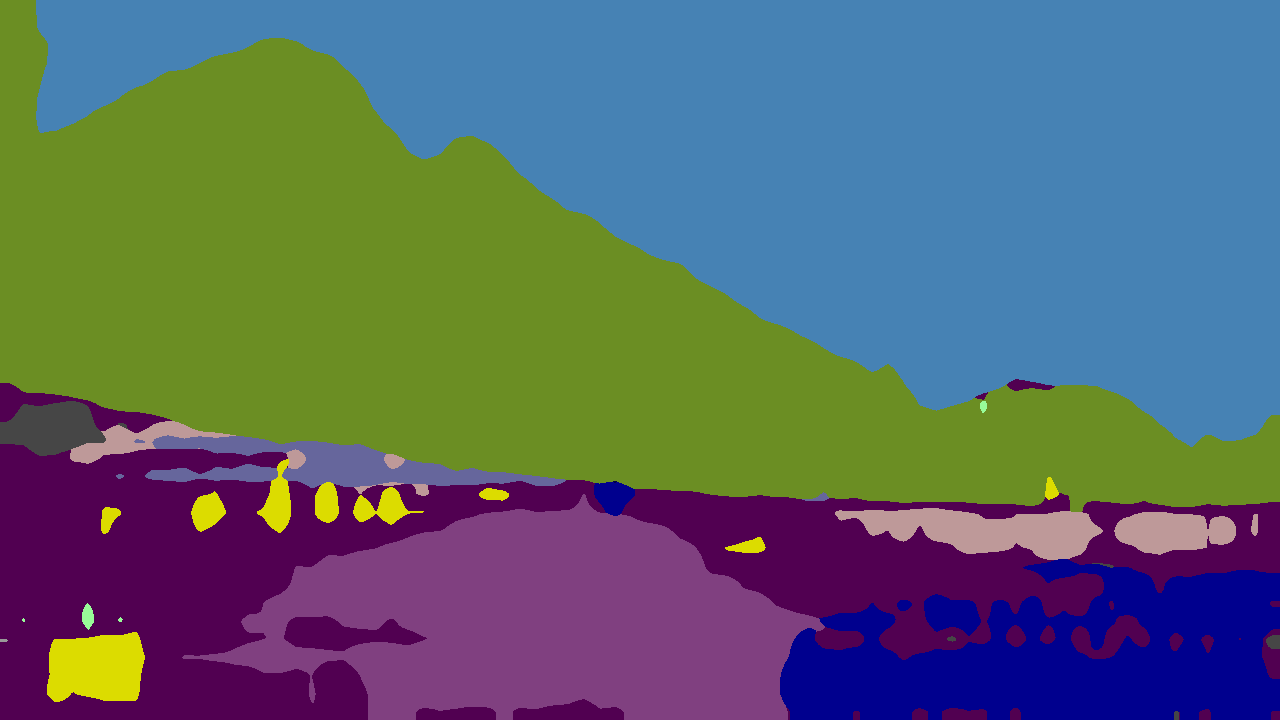

In [9]:
Image.fromarray(viz.astype(np.uint8))

In [10]:
viz.shape

(720, 1280, 3)

# Visualize RGB and generated segmentation
* load RGB image
* load segmentation


In [6]:
# finds doesn't exists files
img_root = '/home/data/vision7/A3D_2.0/frames/'
seg_root = '/home/data/vision7/A3D_2.0/segmentations/'

all_img_folders = glob.glob(os.path.join(img_root, '*'))
all_seg_folders = glob.glob(os.path.join(seg_root, '*'))

for img_folder in all_img_folders:
    video_name = img_folder.split('/')[-1]
    if not os.path.exists(os.path.join(seg_root, video_name)):
        print(video_name)
    

0RJPQ_97dcs_003107
PEwiwzyTjX0_001892
hfwb3mZZ0fs_003976
Hkui6PJboFg_003676
90gyBengKDs_000516
90gyBengKDs_001792
90gyBengKDs_002992
X8VgGb1fJDU_000553
nvVk7L3GrJQ_000337
4OGV0AbV91U_002988
QERvirE3S5s_003408
TlBhM9Xbr2o_002932
bI9JzQSrEGo_000892
2TmFM9p1KF8_004711
kld-iYpdjyo_006255
fWJbp43k644_004359
fWJbp43k644_005901
GDejMONyY4U_001205
r6_ZhT7rmhM_000052
Sihe6aeyLHg_001949
PfJ2CudpCgE_004491
V3--0ubJkNE_002282
TlBhM9Xbr2o_004697
CyeT8rEQOpQ_000448
pWZSG2cUdEo_003363
Q7VBPeGwJWw_001703
Zpo0kwg1XEQ_000508
yhtzAKqRyXw_002137
p-fBcE77G4c_000363
p-fBcE77G4c_002176
p-fBcE77G4c_003118
RASKiMoxhOE_005695
Rrcjy5t8b20_000477
Rrcjy5t8b20_001657
4K_6s1n6BpU_005188
OWtbKblBOKI_005902
K1r3m5OrmB4_004481
K1r3m5OrmB4_004680
4wKjxDXnmYs_002055
V3--0ubJkNE_004618
90gyBengKDs_004651
uO2zGO5ydBc_003316
vZSr9dhRxlE_001335
Z9K13eBUwJM_002229
pQdl0apLT70_001448
pQdl0apLT70_002115
eA-kbOZ1_sc_000879
eA-kbOZ1_sc_001592
eA-kbOZ1_sc_002262
ecRog9N1Qf0_002224
ecRog9N1Qf0_004593
fWJbp43k644_003005
eefNVth0S4g_

In [51]:
from PIL import Image
video_name = 'OWtbKblBOKI_002688'
viz_id = 53

seg = cv2.imread(os.path.join(seg_root, video_name, str(viz_id).zfill(6)+'.png'))
rgb = Image.open(os.path.join(img_root, video_name, 'images', str(viz_id).zfill(6)+'.jpg'))


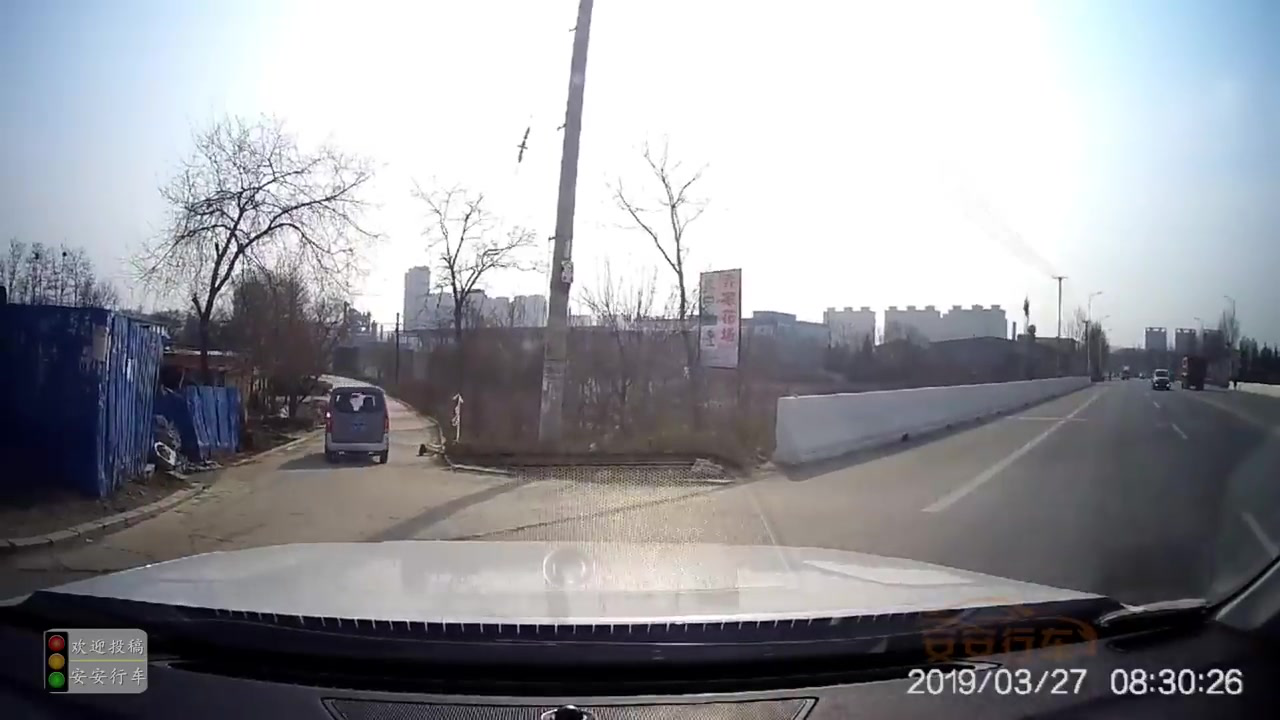

In [52]:
rgb

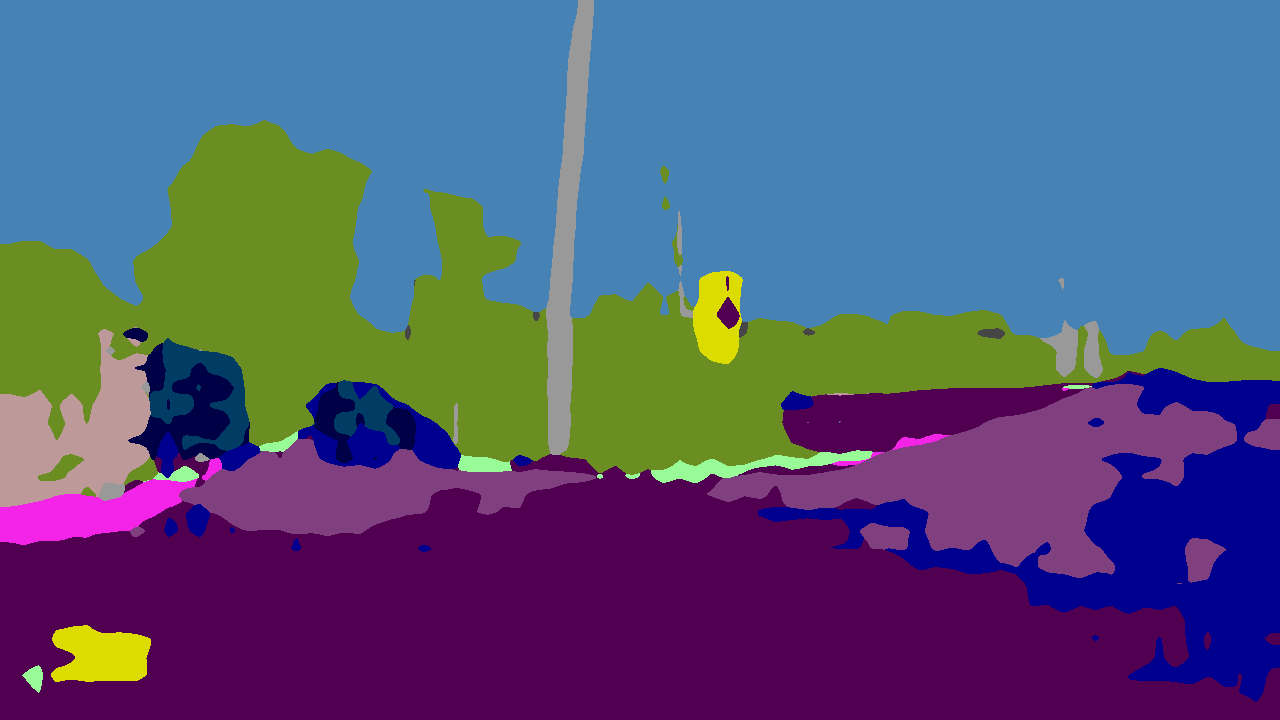

In [53]:
viz = label_img_to_color(seg[...,0]).astype(np.uint8)
Image.fromarray(viz)